<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [2]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'mall_customers.csv',
 'match_result_test.csv',
 'cookie_cats.csv',
 'sales_vs_discount.csv',
 'ab_experiment.csv',
 'ecommerce-data.csv',
 'scanner_data.csv',
 'groceries.csv',
 'test.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sample-sales-data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales.csv',
 'sales_data_with_stores.csv',
 'lead_conversion.csv',
 'app_wau.csv',
 '1_customers_dataset.csv',
 'online_retail_II.xlsx',
 'bz_data_analyis.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 '1_orders_dataset.csv',
 'online_retail.xlsx',
 'mock_sales_data.csv',
 '1_order_payments_dataset.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'sample_data']

In [21]:
df = pd.read_csv('bz_data_analyis.csv')
df['order_date'] = pd.to_datetime(df['order_date'], format = '%m/%d/%y %H:%M')
df['date'] = df['order_date'].to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['weekday'] = df['date'].dt.weekday
df['month'] = df['date'].dt.month
df.head()

<ipython-input-21-46b26744190d>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.


,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,week,weekday
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,2019-12-30,0
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,2019-12-23,6
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,2019-12-09,3
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,2019-12-16,6
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,2019-12-16,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       185950 non-null  int64         
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  object        
 3   price_each        185950 non-null  float64       
 4   purchase_address  185950 non-null  object        
 5   month             185950 non-null  int64         
 6   year              185950 non-null  int64         
 7   day               185950 non-null  int64         
 8   city              185950 non-null  object        
 9   code              185950 non-null  object        
 10  sales             185950 non-null  float64       
 11  order_date        185950 non-null  datetime64[ns]
 12  hour              185950 non-null  int64         
 13  minute            185950 non-null  int64         
 14  coun

In [23]:
df['quantity_ordered'] = df['quantity_ordered'].astype(str)

In [32]:
df = df[~df['quantity_ordered'].str.contains('[a-zA-Z]')]

In [33]:
df['quantity_ordered'] = df['quantity_ordered'].astype(int)

In [34]:
df['rev'] = df['quantity_ordered'] * df['price_each']
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,week,weekday,rev
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,2019-12-30,0,1700.00
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,2019-12-23,6,1800.00
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,2019-12-09,3,35.85
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,2019-12-16,6,299.98
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,2019-12-16,2,11.95


In [38]:
df['weekday'] = df['date'].dt.weekday
list_weekday = dict(zip(range(7), ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']))
df['weekday'] = df['weekday'].apply(lambda x : list_weekday.get(x,x))
df['weekday'] = pd.Categorical(df['weekday2'], categories = list_weekday.values())
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,week,weekday,rev,weekday2
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,2019-12-30,mon,1700.00,mon
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,2019-12-23,sun,1800.00,sun
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,2019-12-09,thu,35.85,thu
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,2019-12-16,sun,299.98,sun
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,2019-12-16,wed,11.95,wed


In [41]:
con_q = df.groupby(['month','weekday'])['rev'].quantile([.25, .5, .75, .95]).reset_index().rename(columns = {'level_2':'q'})
con_q.head()

,month,weekday,q,rev
0,1,mon,0.25,11.95
1,1,mon,0.50,14.95
2,1,mon,0.75,150.00
3,1,mon,0.95,700.00
4,1,tue,0.25,11.95


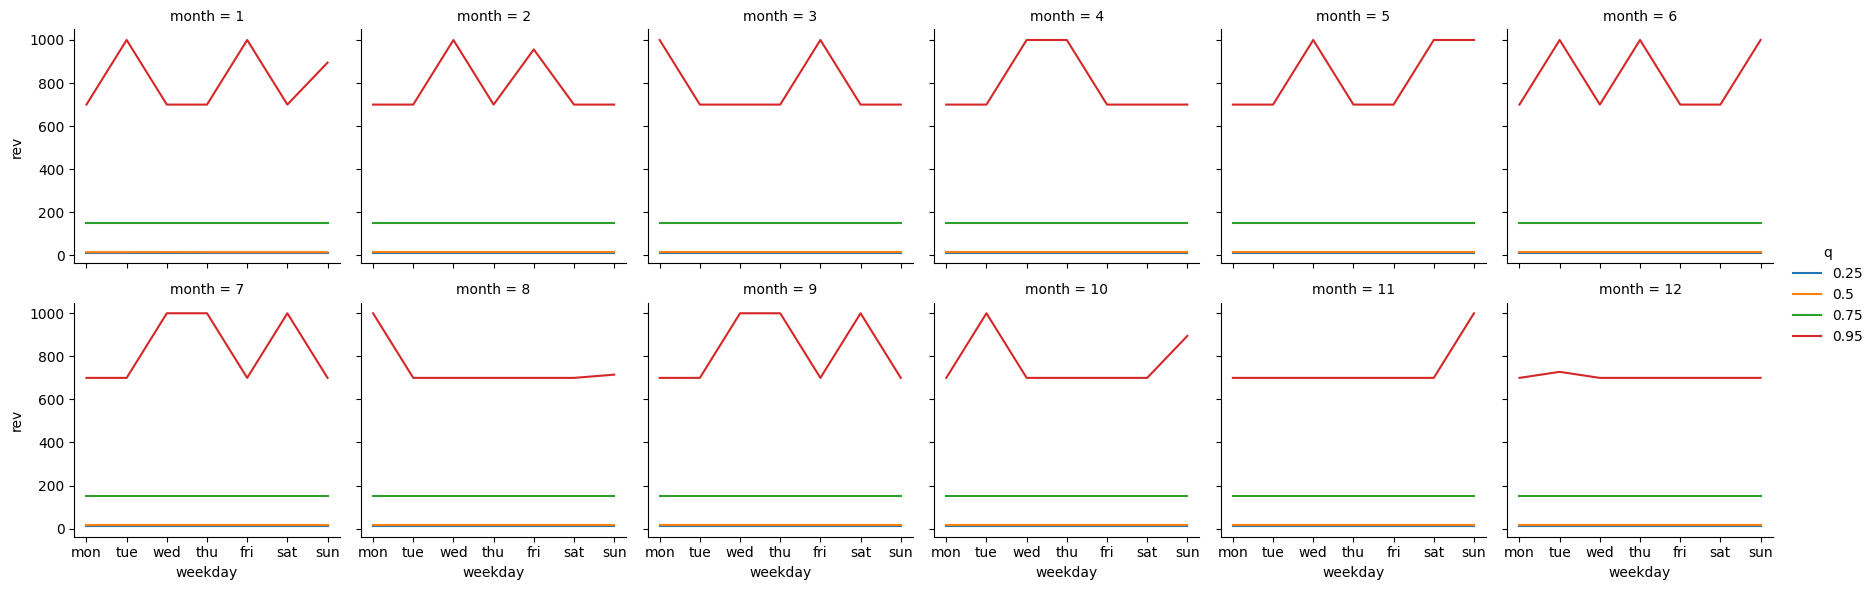

In [42]:
g = sns.FacetGrid(con_q, col = 'month', col_wrap = 6, hue = 'q')
g.map(sns.lineplot, 'weekday', 'rev')
g.add_legend()
plt.show()

In [43]:
df[df['rev'] >= 600]

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,week,weekday,rev,weekday2
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,2019-12-30,mon,1700.00,mon
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,2019-12-23,sun,1800.00,sun
11,295676,ThinkPad Laptop,1,999.99,"410 Lincoln St, Los Angeles, CA 90001",12,2019,28,Los Angeles (CA),CA,999.99,2019-12-28 17:19:00,17,19,1,2019-12-28,2019-12-23,sat,999.99,sat
16,295681,Google Phone,1,600.00,"79 Elm St, Boston, MA 02215",12,2019,25,Boston (MA),MA,600.00,2019-12-25 12:37:00,12,37,1,2019-12-25,2019-12-23,wed,600.00,wed
27,295689,LG Washing Machine,1,600.00,"173 Lake St, San Francisco, CA 94016",12,2019,24,San Francisco (CA),CA,600.00,2019-12-24 11:21:00,11,21,1,2019-12-24,2019-12-23,tue,600.00,tue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185913,222876,LG Washing Machine,1,600.00,"749 Madison St, San Francisco, CA 94016",6,2019,8,San Francisco (CA),CA,600.00,2019-06-08 12:31:00,12,31,1,2019-06-08,2019-06-03,sat,600.00,sat
185922,222884,Google Phone,1,600.00,"819 Pine St, New York City, NY 10001",6,2019,4,New York City (NY),NY,600.00,2019-06-04 12:06:00,12,6,1,2019-06-04,2019-06-03,tue,600.00,tue
185924,222885,LG Dryer,1,600.00,"447 Spruce St, New York City, NY 10001",6,2019,1,New York City (NY),NY,600.00,2019-06-01 13:22:00,13,22,1,2019-06-01,2019-05-27,sat,600.00,sat
185942,222903,iPhone,1,700.00,"685 Hickory St, New York City, NY 10001",6,2019,7,New York City (NY),NY,700.00,2019-06-07 22:21:00,22,21,1,2019-06-07,2019-06-03,fri,700.00,fri


In [47]:
con_q2 = pd.pivot_table(con_q, index = ['month','weekday'], columns = 'q', values = 'rev').reset_index()
con_q2.head()

q,month,weekday,0.25,0.5,0.75,0.95
0,1,mon,11.95,14.95,150.0,700.00
1,1,tue,11.95,14.95,150.0,999.99
2,1,wed,11.95,15.36,150.0,700.00
3,1,thu,11.95,14.95,150.0,700.00
4,1,fri,11.95,14.95,150.0,999.99


In [63]:
con_q2.groupby(['month', 'weekday'])[[0.25, 0.5, 0.75, 0.95]].apply(lambda x: x.reset_index(drop=True).to_dict())

month  weekday
1      mon        {0.25: {0: 11.95}, 0.5: {0: 14.95}, 0.75: {0: ...
       tue        {0.25: {0: 11.95}, 0.5: {0: 14.95}, 0.75: {0: ...
       wed        {0.25: {0: 11.95}, 0.5: {0: 15.36}, 0.75: {0: ...
       thu        {0.25: {0: 11.95}, 0.5: {0: 14.95}, 0.75: {0: ...
       fri        {0.25: {0: 11.95}, 0.5: {0: 14.95}, 0.75: {0: ...
                                        ...                        
12     wed        {0.25: {0: 11.95}, 0.5: {0: 14.95}, 0.75: {0: ...
       thu        {0.25: {0: 11.95}, 0.5: {0: 14.95}, 0.75: {0: ...
       fri        {0.25: {0: 11.95}, 0.5: {0: 14.95}, 0.75: {0: ...
       sat        {0.25: {0: 11.95}, 0.5: {0: 14.95}, 0.75: {0: ...
       sun        {0.25: {0: 11.95}, 0.5: {0: 14.95}, 0.75: {0: ...
Length: 84, dtype: object

In [49]:
df2 = pd.merge(df, con_q2, 'left', ['month','weekday'])
df2.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,week,weekday,rev,weekday2,0.25,0.5,0.75,0.95
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,2019-12-30,mon,1700.00,mon,11.95,14.95,150.0,700.0
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,2019-12-23,sun,1800.00,sun,11.95,14.95,150.0,700.0
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,2019-12-09,thu,35.85,thu,11.95,14.95,150.0,700.0
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,2019-12-16,sun,299.98,sun,11.95,14.95,150.0,700.0
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,2019-12-16,wed,11.95,wed,11.95,14.95,150.0,700.0


# Iterators

In [64]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [65]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [66]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}